# Iris Flowers Classification - ML Project 

<b>The data set contains 3 classes of 50 instances each
  where each class refers to a type of iris plant.  One class is
  linearly separable from the other 2; the latter are NOT linearly
  separable from each other.
   --- Predicted attribute: class of iris plant. </b>
### Attribute Information:
   1. sepal length in cm <br>
   2. sepal width in cm <br>
   3. petal length in cm <br>
   4. petal width in cm  <br>
   5. class: <br>
      -- Iris Setosa <br>
      -- Iris Versicolour <br>
      -- Iris Virginica   



# Importing Modules

In [2]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [3]:
df = pd.read_csv("Iris.csv")

In [4]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df = df.drop(columns = ["Id"]) #Dropping ['Id'] column because it's irrelevant
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.describe() #Data Statistics

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Preprocessing Dataset


In [9]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

## Histograms

<AxesSubplot:>

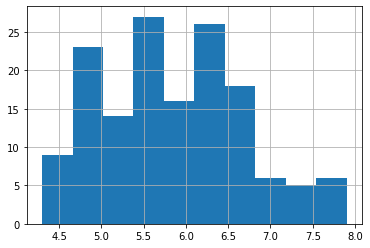

In [47]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

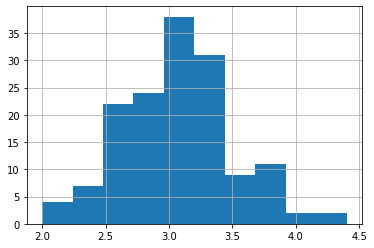

In [48]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

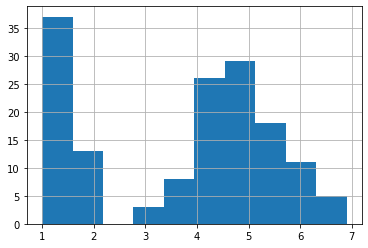

In [49]:
df['PetalLengthCm'].hist()

## Scatterplot

In [50]:
colors = ['red', 'blue', 'yellow']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

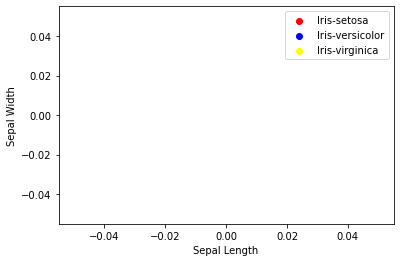

In [51]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

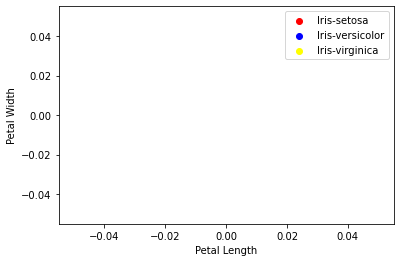

In [52]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

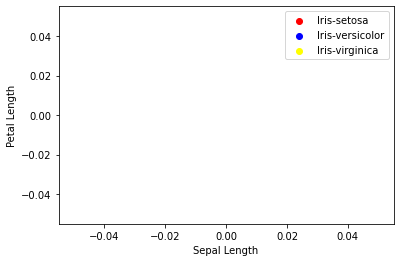

In [53]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

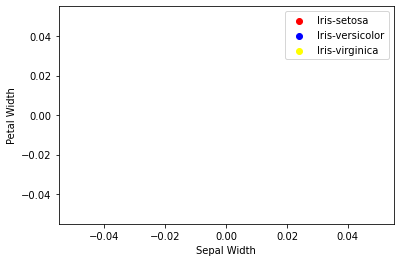

In [54]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

# Correlation Matrix

### A correlation matrix is simply a table which displays the correlation. The measure is best used in variables that demonstrate a linear relationship between two variables. 

In [55]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

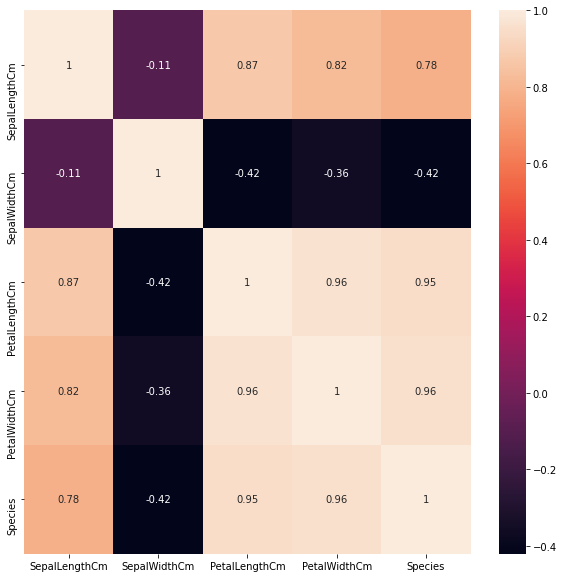

In [56]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, ax=ax)

# Label Encoder

### Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.

In [57]:
from sklearn.preprocessing import LabelEncoder
labelencode = LabelEncoder()

In [58]:
df['Species'] = labelencode.fit_transform(df['Species'])

In [59]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [122]:
from sklearn.model_selection import train_test_split


In [123]:
X= df.drop(columns = ['Species'])
y = df['Species']
X_train, X_test,  y_train, y_test = train_test_split(X, y, train_size=0.30)


## Linear Regression Classification

In [147]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [163]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [164]:
print('Model Score (Accuracy): ', model.score(X_test, y_test) * 100) #to check accuracy of the model

Model Score (Accuracy):  95.23809523809523


## KNN - KNearestNeighbor Classification

In [165]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [166]:
model.fit(X_train, y_train)


KNeighborsClassifier()

In [167]:
print('Model Score (Accuracy): ', model.score(X_test, y_test) * 100) #to check accuracy of the model

Model Score (Accuracy):  95.23809523809523
